In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')


In [16]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
13952,1,0.492308,1.0,0.557692,0.000000,1,1,0.420758,0.950617,0.020761,0
169615,1,0.538462,1.0,0.153846,1.000000,1,0,0.677947,0.043210,0.086505,0
172360,1,0.061538,1.0,0.211538,1.000000,0,0,0.395596,0.932099,0.733564,0
27383,1,0.446154,1.0,0.634615,0.000000,1,1,0.000000,0.956790,0.726644,0
164513,1,0.138462,1.0,0.538462,0.459969,0,0,0.653444,0.932099,0.674740,0


In [17]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
6420,1,0.907692,1,0.538462,1,1,0,0.066383,0.154321,0.197232,0
12463,0,0.292308,1,0.557692,0,1,1,0.057410,0.759259,0.453287,1
25256,0,0.646154,1,0.538462,0,1,0,0.049721,0.179012,0.224913,0
10070,1,0.538462,1,0.903846,1,1,0,0.058885,0.759259,0.737024,0
26075,0,0.400000,1,0.538462,1,1,0,0.076877,0.154321,0.141869,0


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

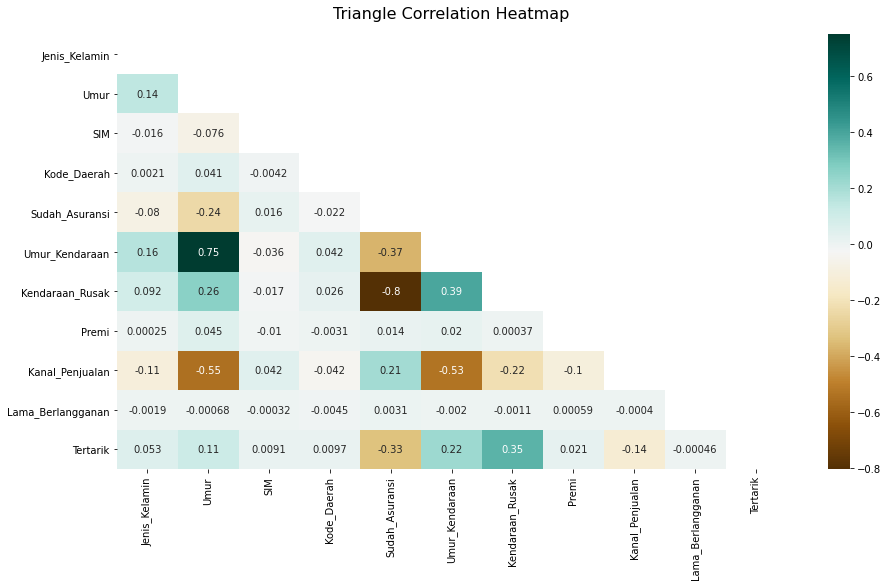

In [18]:
plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)

0    209629
1     29049
Name: Tertarik, dtype: int64


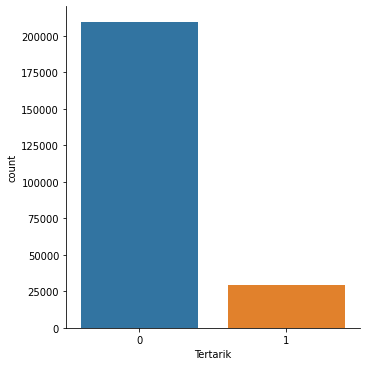

In [19]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [20]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [21]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x_data, y_data = smt.fit_sample(x_data, y_data)

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (335406, 10)
x_test shape: (83852, 10)
---------------------------------
y_train shape: (335406,)
y_test shape: (83852,)


## **Tuning Model**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


In [24]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=2000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    SGDClassifier(loss="hinge", penalty="l2"),
    GaussianNB()
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
    'Stochastic Gradient Descent',
    'Naive Bayes'
]


In [25]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [26]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 87.99
Akurasi model Logistic Regression: 77.44
Akurasi model Gradient Boosting: 83.08
Akurasi model AdaBoost: 81.54
Akurasi model Random Forest: 91.72
Akurasi model Stochastic Gradient Descent: 78.34
Akurasi model Naive Bayes: 76.84


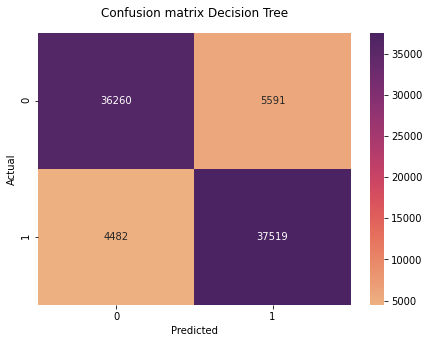


               precision    recall  f1-score   support

           0       0.89      0.87      0.88     41851
           1       0.87      0.89      0.88     42001

    accuracy                           0.88     83852
   macro avg       0.88      0.88      0.88     83852
weighted avg       0.88      0.88      0.88     83852




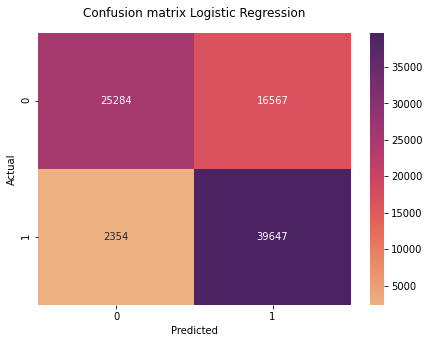


               precision    recall  f1-score   support

           0       0.91      0.60      0.73     41851
           1       0.71      0.94      0.81     42001

    accuracy                           0.77     83852
   macro avg       0.81      0.77      0.77     83852
weighted avg       0.81      0.77      0.77     83852




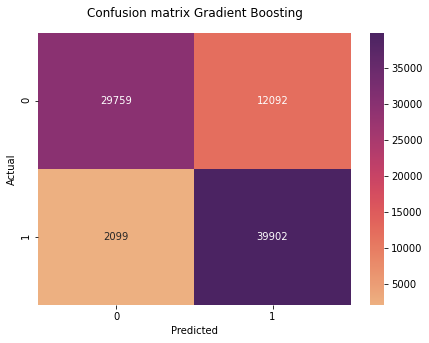


               precision    recall  f1-score   support

           0       0.93      0.71      0.81     41851
           1       0.77      0.95      0.85     42001

    accuracy                           0.83     83852
   macro avg       0.85      0.83      0.83     83852
weighted avg       0.85      0.83      0.83     83852




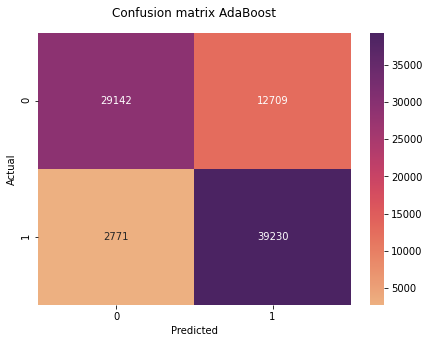


               precision    recall  f1-score   support

           0       0.91      0.70      0.79     41851
           1       0.76      0.93      0.84     42001

    accuracy                           0.82     83852
   macro avg       0.83      0.82      0.81     83852
weighted avg       0.83      0.82      0.81     83852




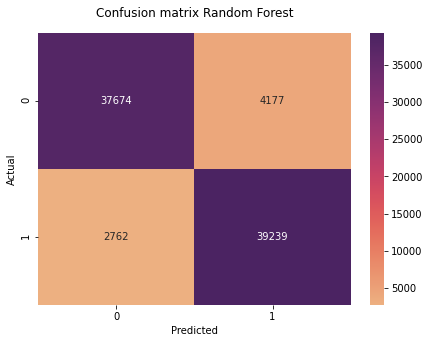


               precision    recall  f1-score   support

           0       0.93      0.90      0.92     41851
           1       0.90      0.93      0.92     42001

    accuracy                           0.92     83852
   macro avg       0.92      0.92      0.92     83852
weighted avg       0.92      0.92      0.92     83852




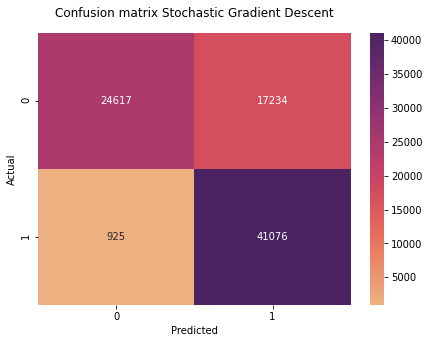


               precision    recall  f1-score   support

           0       0.96      0.59      0.73     41851
           1       0.70      0.98      0.82     42001

    accuracy                           0.78     83852
   macro avg       0.83      0.78      0.77     83852
weighted avg       0.83      0.78      0.77     83852




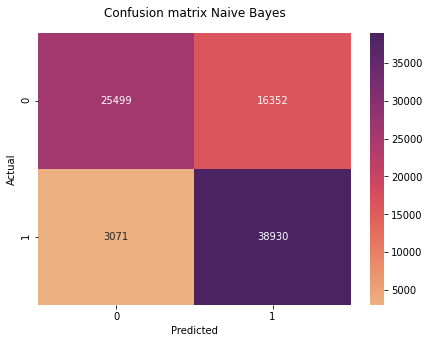


               precision    recall  f1-score   support

           0       0.89      0.61      0.72     41851
           1       0.70      0.93      0.80     42001

    accuracy                           0.77     83852
   macro avg       0.80      0.77      0.76     83852
weighted avg       0.80      0.77      0.76     83852




In [27]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

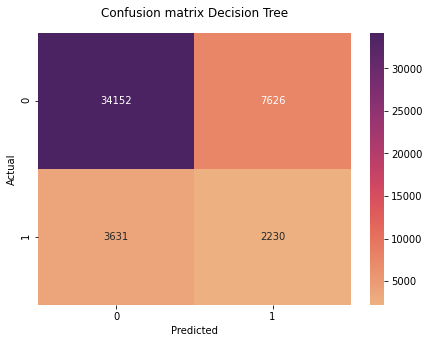


               precision    recall  f1-score   support

           0       0.90      0.82      0.86     41778
           1       0.23      0.38      0.28      5861

    accuracy                           0.76     47639
   macro avg       0.57      0.60      0.57     47639
weighted avg       0.82      0.76      0.79     47639




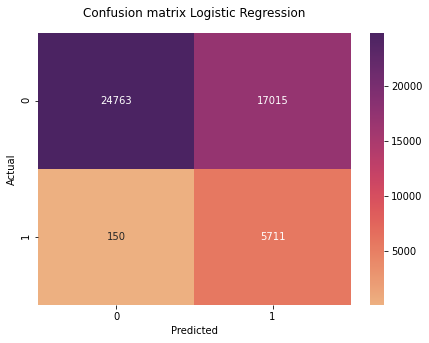


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.97      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




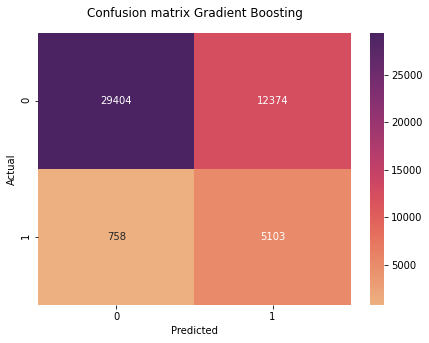


               precision    recall  f1-score   support

           0       0.97      0.70      0.82     41778
           1       0.29      0.87      0.44      5861

    accuracy                           0.72     47639
   macro avg       0.63      0.79      0.63     47639
weighted avg       0.89      0.72      0.77     47639




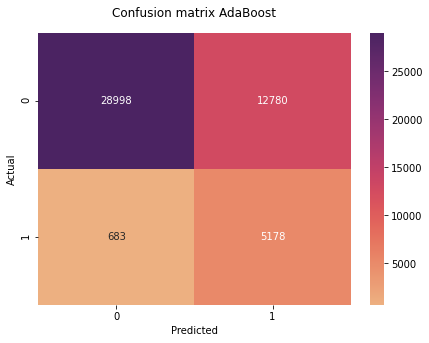


               precision    recall  f1-score   support

           0       0.98      0.69      0.81     41778
           1       0.29      0.88      0.43      5861

    accuracy                           0.72     47639
   macro avg       0.63      0.79      0.62     47639
weighted avg       0.89      0.72      0.77     47639




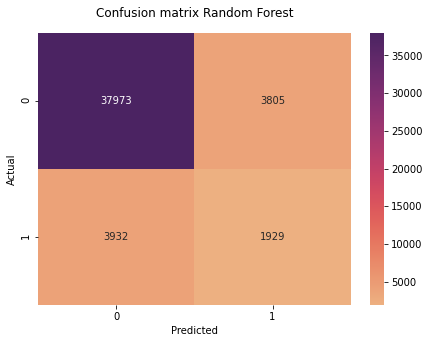


               precision    recall  f1-score   support

           0       0.91      0.91      0.91     41778
           1       0.34      0.33      0.33      5861

    accuracy                           0.84     47639
   macro avg       0.62      0.62      0.62     47639
weighted avg       0.84      0.84      0.84     47639




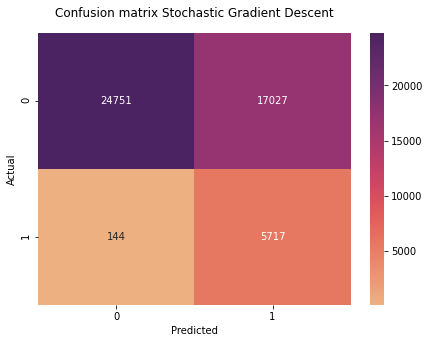


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




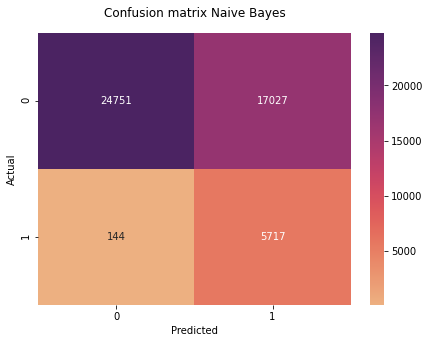


               precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639




In [28]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
